In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import json
from pathlib import Path

import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

from constants import DIFFUSION_MODEL_REPO, MODEL_FOLDER_PATH, CUDA_DEVICE
from diffusers import StableDiffusionPipeline

### 1. process, crop, and resize image (e.g., https://www.birme.net)

### 2. create captions, export to file metadata.jsonl

### 3. train lora using Huggingface script train_text_to_image_lora.py (see `train_lora.sh`)

### 4. load lora

4.1 Flemish tapestry

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

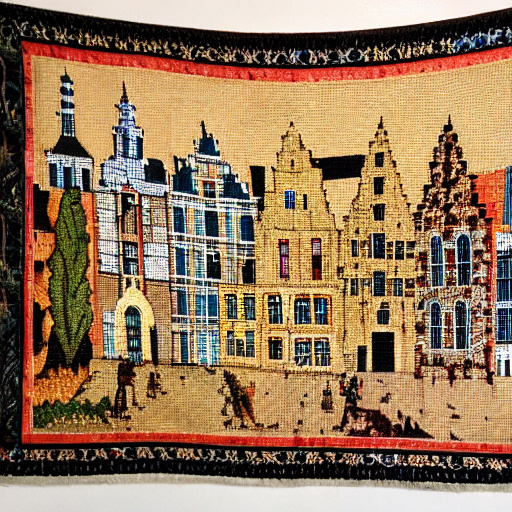

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(DIFFUSION_MODEL_REPO, cache_dir=MODEL_FOLDER_PATH).to(CUDA_DEVICE)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

torch.manual_seed(0)
image = pipe(
    "Ghent, but Flemish tapestry style", num_inference_steps=50, guidance_scale=7.5
).images[0]
image

In [4]:
pipe.unet.load_attn_procs("/home/bkang/ugent_aigc_course_dev/3_image_generation/tmp/lora/flemish_tapestry_model/pytorch_lora_weights.safetensors")
pipe.to(CUDA_DEVICE);

  0%|          | 0/25 [00:00<?, ?it/s]

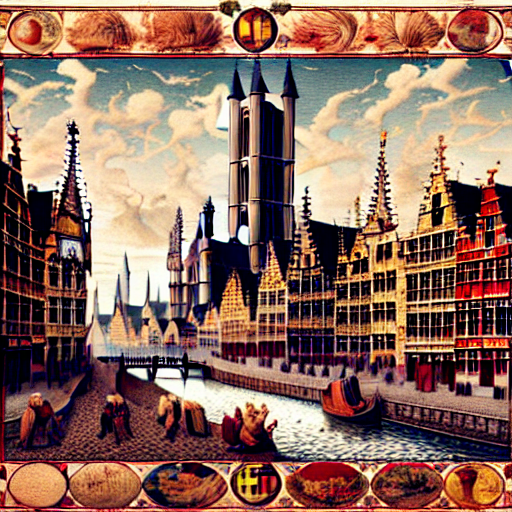

In [5]:
torch.manual_seed(0)
image = pipe(
    "UGENTAIGC3 Ghent", num_inference_steps=25, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.9}
).images[0]
image

4.2 Rorschach inkblot style

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

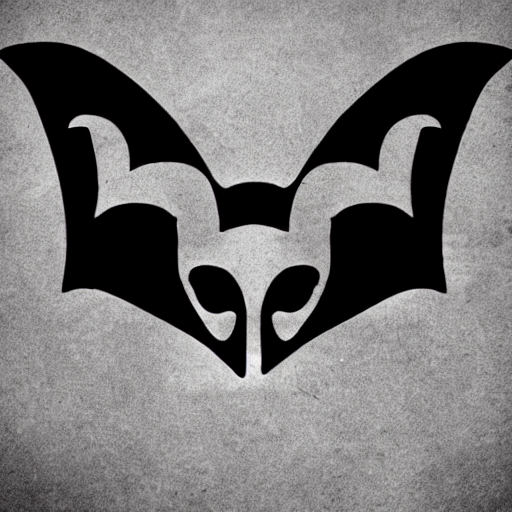

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(DIFFUSION_MODEL_REPO, cache_dir=MODEL_FOLDER_PATH).to(CUDA_DEVICE)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

torch.manual_seed(2)
image = pipe(
    "a bat, but Rorschach inkblot style", num_inference_steps=50, guidance_scale=7.5
).images[0]
image

In [7]:
pipe.unet.load_attn_procs("/home/bkang/ugent_aigc_course_dev/3_image_generation/tmp/lora/rorschach_inkblot_model/pytorch_lora_weights.safetensors")
pipe.to(CUDA_DEVICE);

  0%|          | 0/50 [00:00<?, ?it/s]

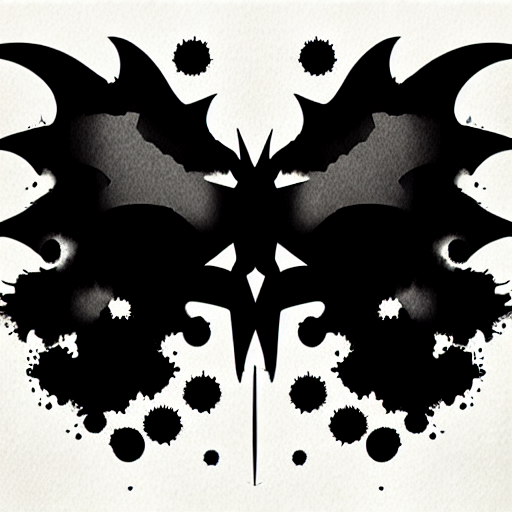

In [8]:
torch.manual_seed(2)
image = pipe(
    "UGENTAIGC3 bat", num_inference_steps=50, guidance_scale=7.5, cross_attention_kwargs={"scale": 0.8}
).images[0]
image